In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [5]:
bank = pd.read_csv('bank-full.csv', delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Data Analysis

In [6]:
bank.shape

(45211, 17)

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [12]:
bank[bank.duplicated()].shape

(0, 17)

#Seperate Discrete & Continuous variables

In [13]:
n = [i for i in bank.columns if bank[i].dtypes != 'O']
print('Number of numerical variables:', len(n))

# Visualize the numerical variables
bank[n].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [14]:
discrete_variables = [i for i in n if len(bank[i].unique())<25]
print('Discrete Variables: ',len(discrete_variables))

Discrete Variables:  0


In [15]:
continuous_variables = [i for i in n if i not in discrete_variables]
print('Continuous Variables:', len(continuous_variables))

Continuous Variables: 7


#Perform EDA

In [16]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


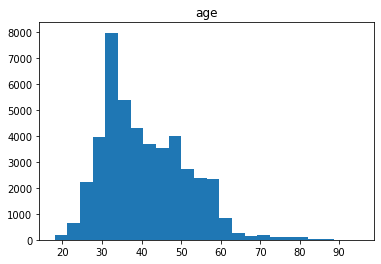

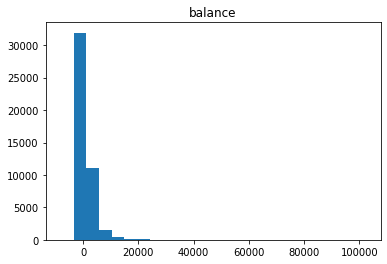

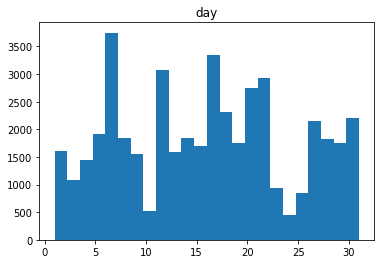

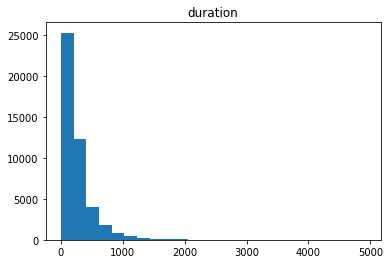

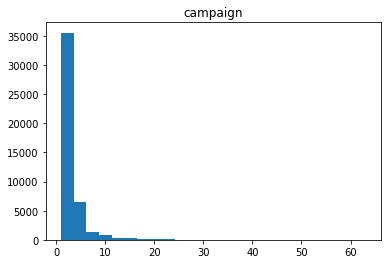

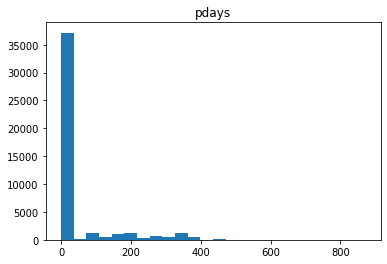

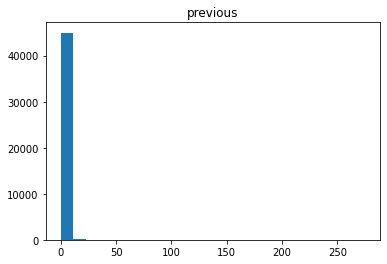

In [17]:
for v in continuous_variables:
    bank1 = bank.copy()
    #data[v].hist(bins=24)   
    plt.hist(bank1[v],bins=24)
    plt.title(v)
    plt.show()

#Applying Transformations to our Continuous variables

**1) Square Root transformation**

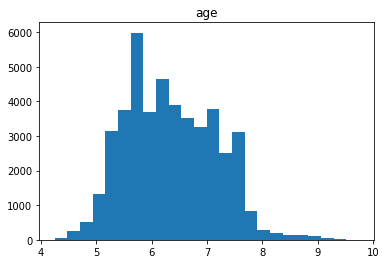

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


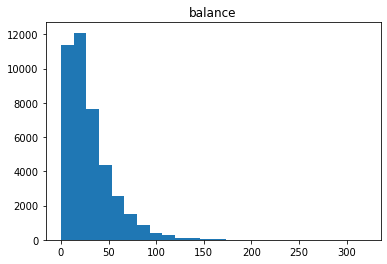

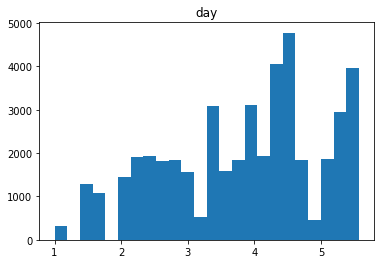

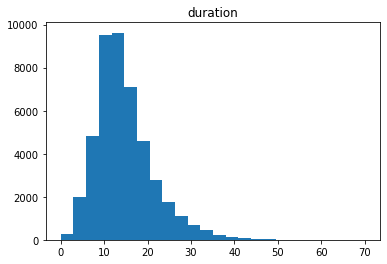

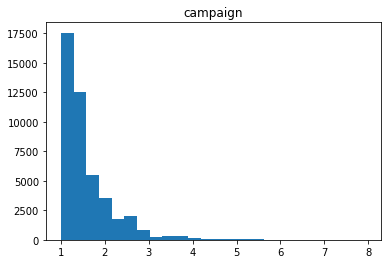

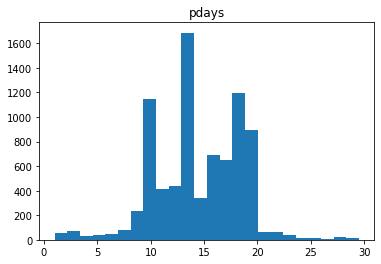

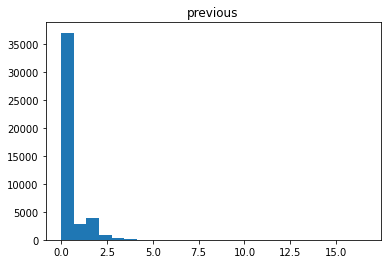

In [18]:
for v in continuous_variables:
    bank1 = bank.copy()
    bank1[v]=np.sqrt(bank1[v])
    plt.hist(bank1[v],bins=24)
    plt.title(v)
    plt.show()

**2) Cube Root transformation**

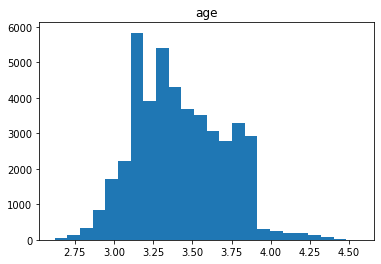

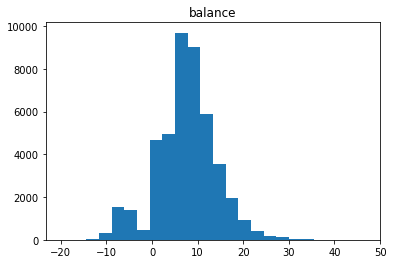

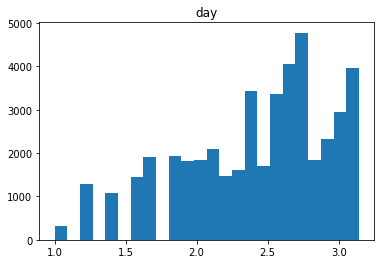

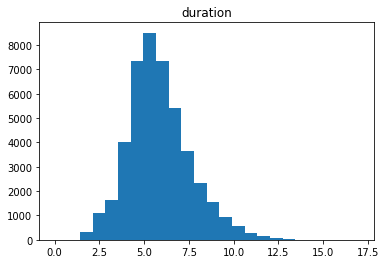

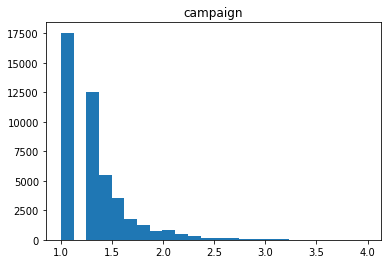

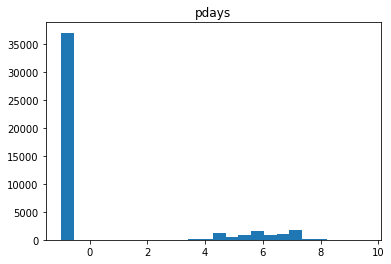

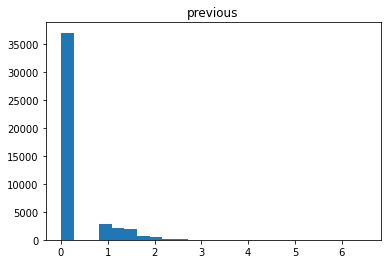

In [19]:
for v in continuous_variables:
    bank1 = bank.copy()
    bank1[v]=np.cbrt(bank1[v])
    plt.hist(bank1[v],bins=24)
    plt.title(v)
    plt.show()

**3) Log transformation**

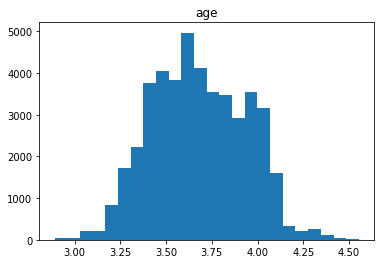

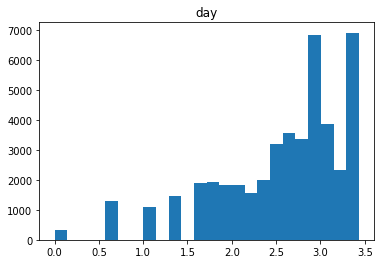

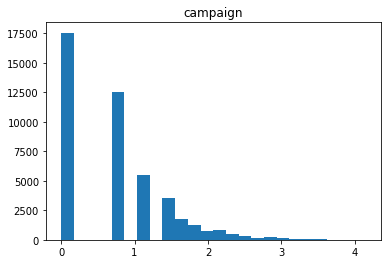

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


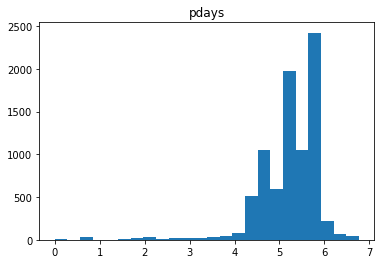

In [20]:
for v in continuous_variables:
    bank1 = bank.copy()
    if 0 in bank1[v].unique():
        continue
    else:
        bank1[v]=np.log(bank1[v])
        plt.hist(bank1[v],bins=24)
        plt.title(v)
        plt.show()

#Detection of Influencers/Outliers

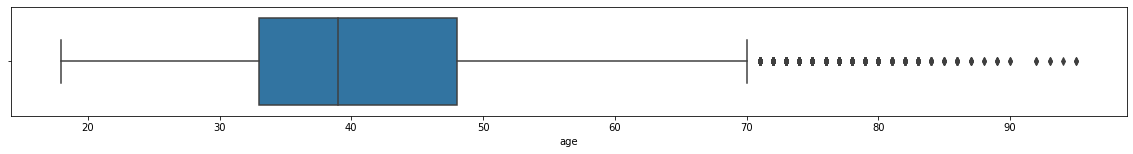

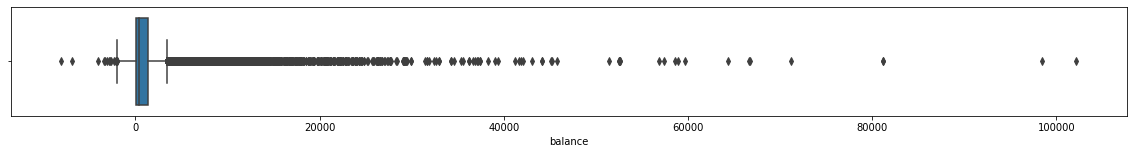

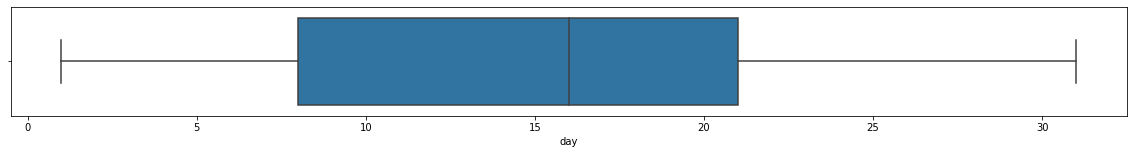

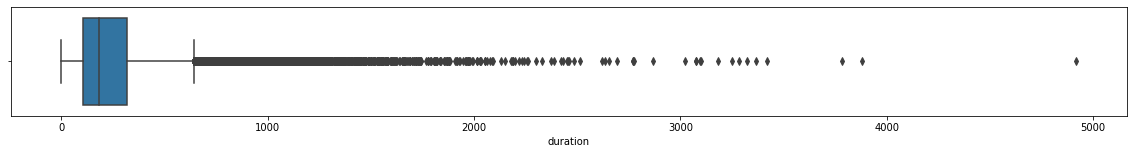

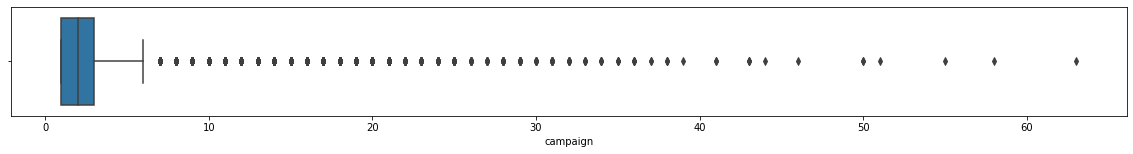

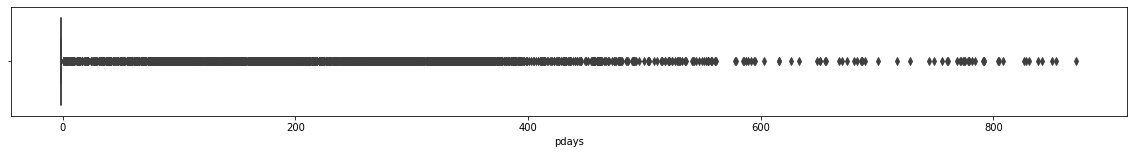

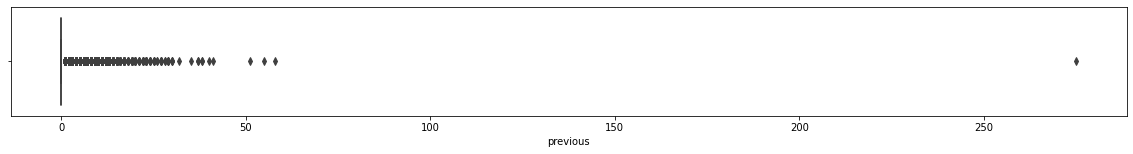

In [21]:
bank1=bank.copy() 

plt.figure(figsize=(20,2))
sns.boxplot(x='age',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='balance',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='day',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='duration',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='campaign',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='pdays',data=bank1)

plt.figure(figsize=(20,2))
sns.boxplot(x='previous',data=bank1)

plt.show()

# Outliers After Transformation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


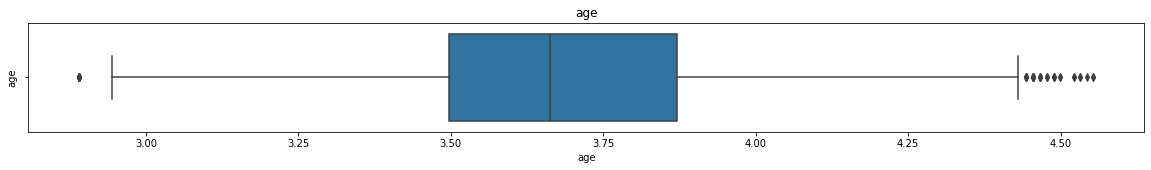

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


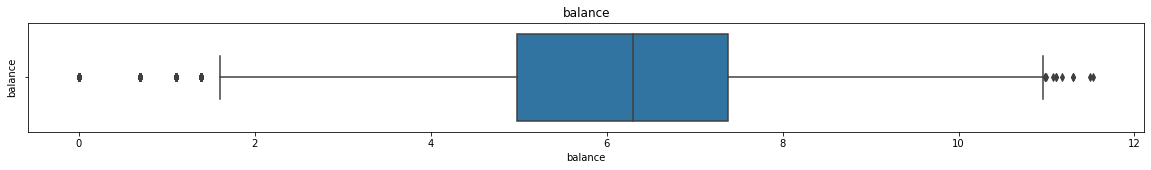

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


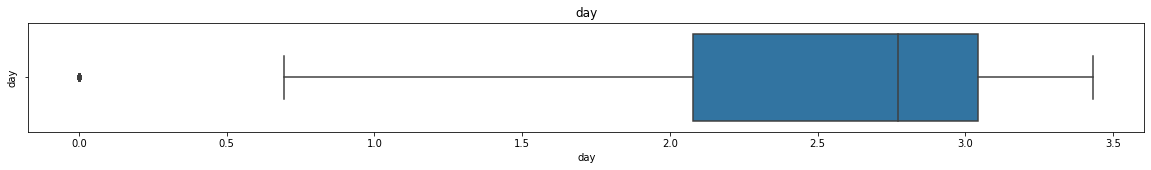

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


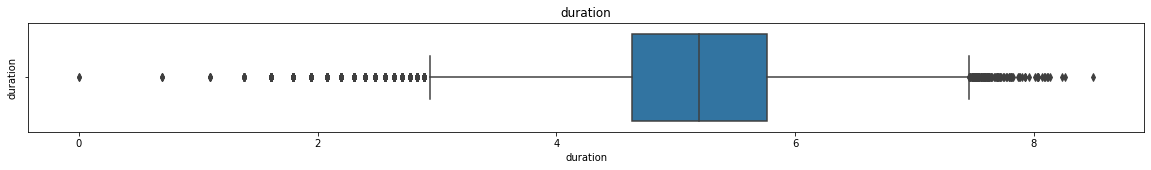

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


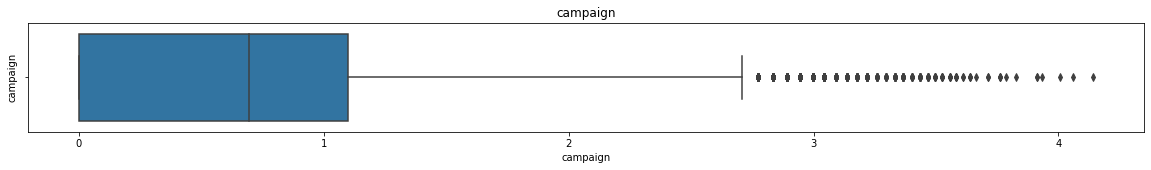

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


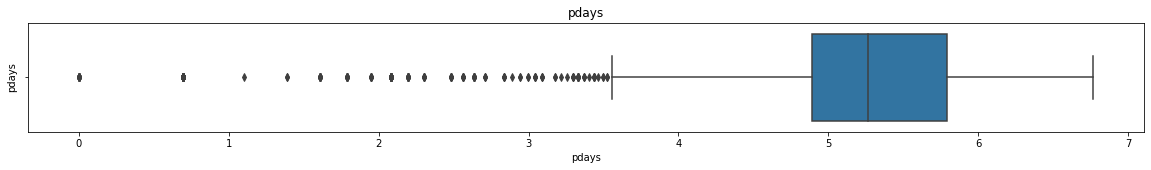

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


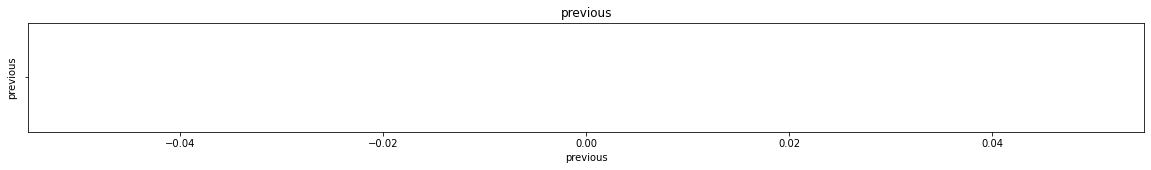

In [22]:
for v in continuous_variables:
    bank1=bank.copy()
    bank1[v]=np.log(bank1[v])
    plt.figure(figsize=(20,2))
    sns.boxplot(bank1[v])
    plt.ylabel(v)
    plt.title(v)
    plt.show()

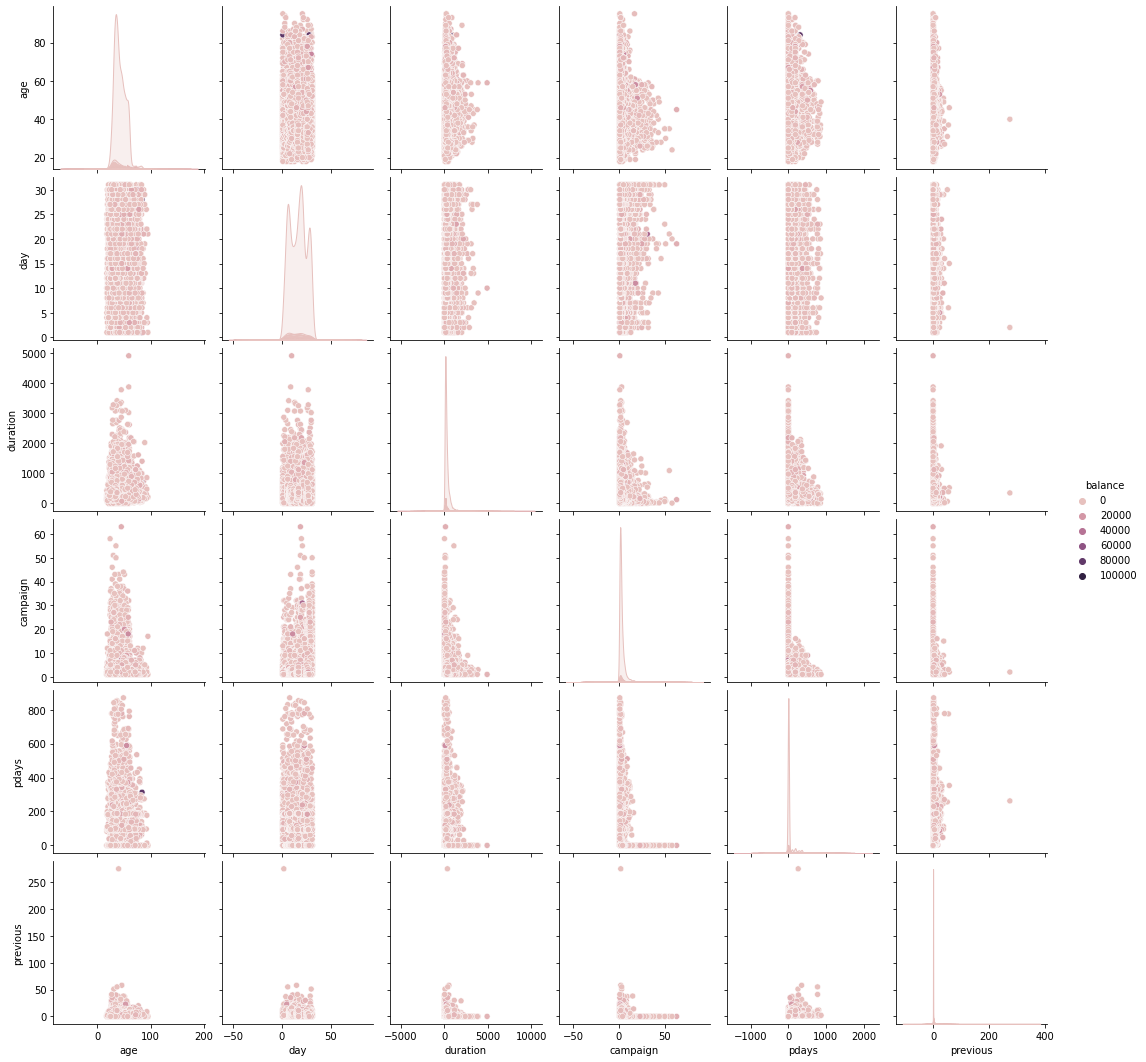

In [23]:
sns.pairplot(bank, hue='balance')
plt.show()
     

# Seperating Continuous & Discrete variables

In [24]:
# List of Numerical Variables
numerical_variables=[v for v in bank.columns if bank[v].dtypes != 'O']

bank[numerical_variables].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [25]:
discrete_variables=[v for v in numerical_variables if len(bank[v].unique())<2]
print('Discrete Variables Count: {}'.format(len(discrete_variables)))

Discrete Variables Count: 0


In [26]:
continuous_variables=[v for v in numerical_variables if v not in discrete_variables]
print('Continuous Feature Count {}'.format(len(continuous_variables)))

Continuous Feature Count 7


In [27]:
bank[continuous_variables].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#Data Analysis for Categorical Data



In [28]:
# Categorical Variables in our data

In [29]:
categorical_variables=[v for v in bank.columns if bank[v].dtype=='O']
print('Number of Categorical Variables:',len(categorical_variables), '\n', categorical_variables)
bank[categorical_variables].head()

Number of Categorical Variables: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


Text(0.5, 1.0, 'Jobs')

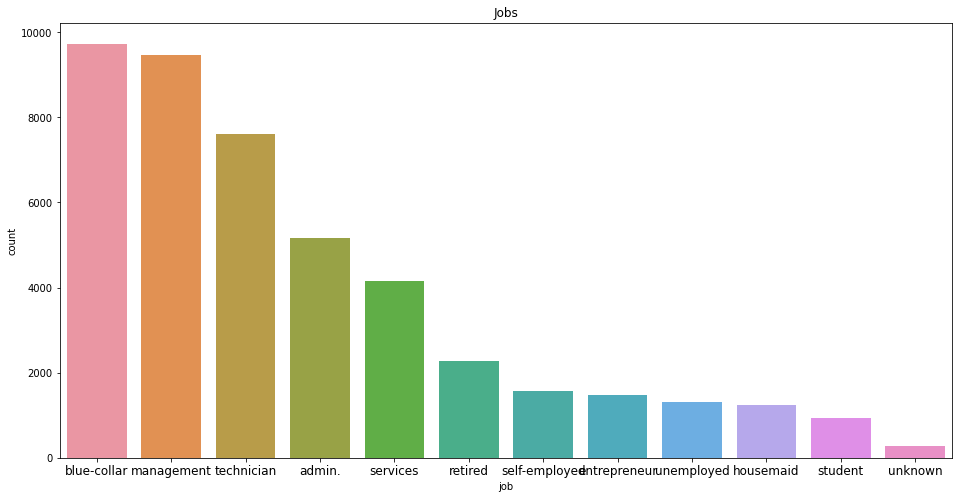

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(x='job', data=bank, 
              order=bank['job'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

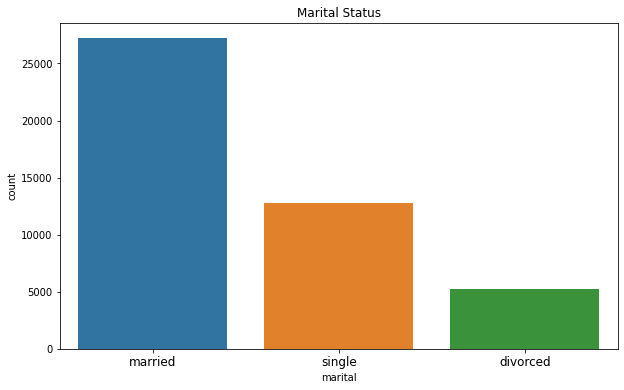

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital', data=bank, 
              order=bank['marital'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

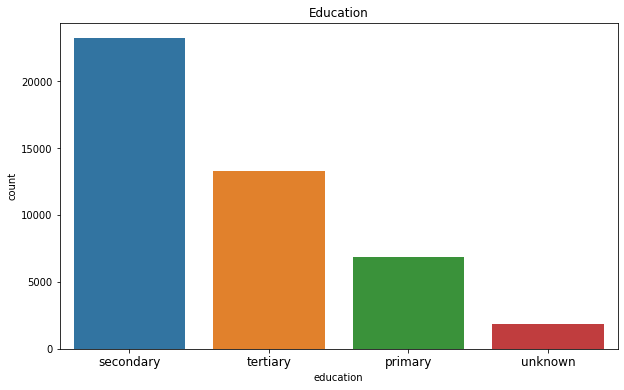

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=bank, 
              order=bank['education'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

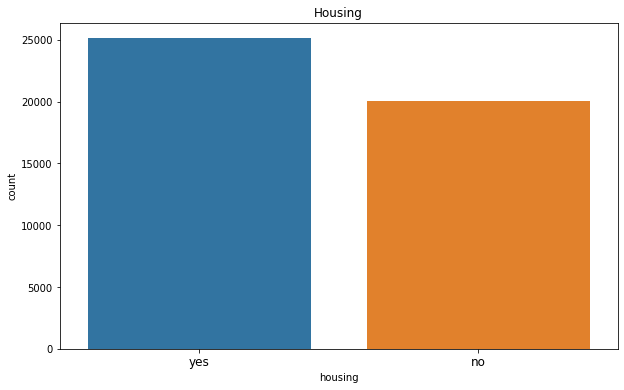

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='housing', data=bank, 
              order=bank['housing'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

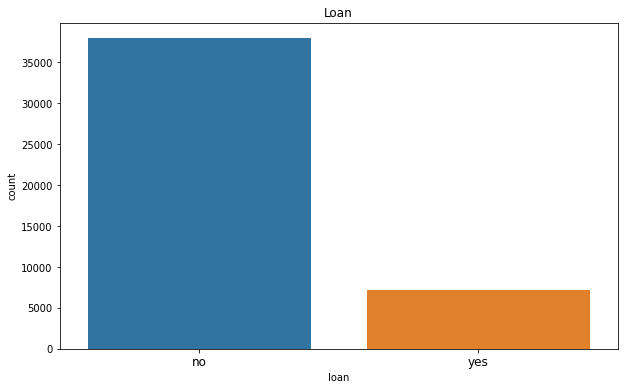

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan', data=bank, 
              order=bank['loan'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Loan')

#Data Visualization

In [35]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**1) Visualizing Deposit with other variables**

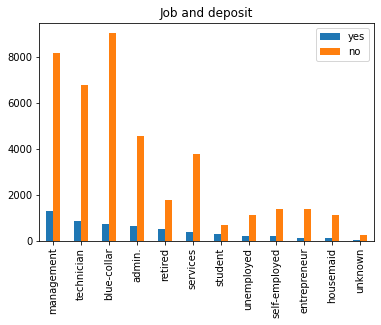

In [36]:
# Lets find Job and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
data['no'] = bank[bank['y'] == 'no']['job'].value_counts()
data.plot.bar(title = 'Job and deposit')

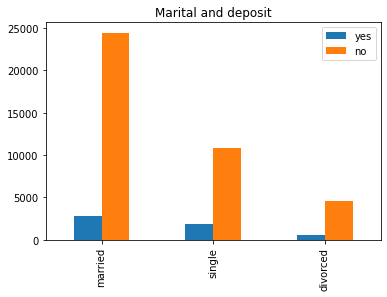

In [37]:
# Lets find Marital and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
data['no'] = bank[bank['y'] == 'no']['marital'].value_counts()
data.plot.bar(title = 'Marital and deposit')

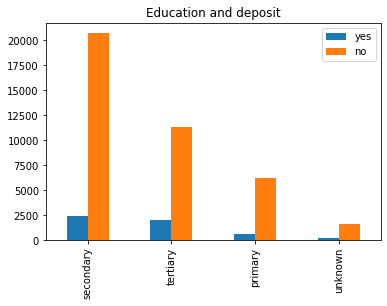

In [38]:
# Lets find Education and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
data['no'] = bank[bank['y'] == 'no']['education'].value_counts()
data.plot.bar(title = 'Education and deposit')

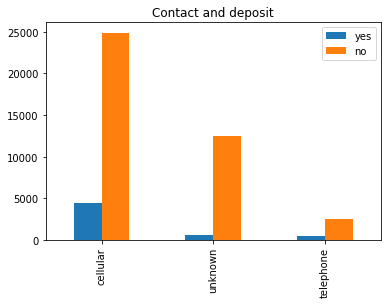

In [39]:
# Lets find Contact and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
data['no'] = bank[bank['y'] == 'no']['contact'].value_counts()
data.plot.bar(title = 'Contact and deposit')

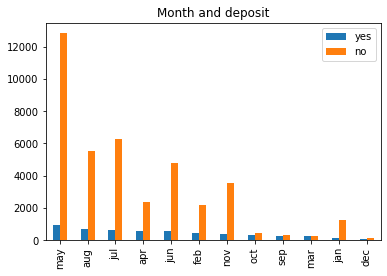

In [40]:
# Lets find Month and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['month'].value_counts()
data['no'] = bank[bank['y'] == 'no']['month'].value_counts()
data.plot.bar(title = 'Month and deposit')

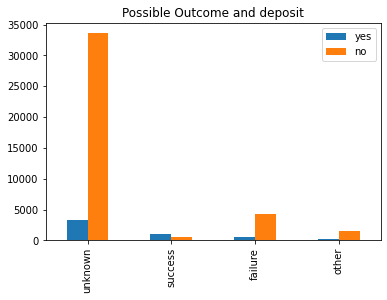

In [41]:
# Lets find Possible outcomes and Deposit
data = pd.DataFrame()
data['yes'] = bank[bank['y'] == 'yes']['poutcome'].value_counts()
data['no'] = bank[bank['y'] == 'no']['poutcome'].value_counts()
data.plot.bar(title = 'Possible Outcome and deposit')

As we can see most of the customers are less likely to subscribe for term deposit.

#Visualizing the subscription rate

**1) Subscription rate by Job**

In [42]:
bank1 = bank.copy()
bank1.rename(columns={'y': 'subscription'}, inplace = True)

In [43]:
job_subscription = pd.crosstab(bank1['subscription'],bank1['job']).apply(lambda x: x/x.sum() * 100)
job_subscription

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscription,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [44]:
job_subscription = job_subscription.transpose()
job_subscription

subscription,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


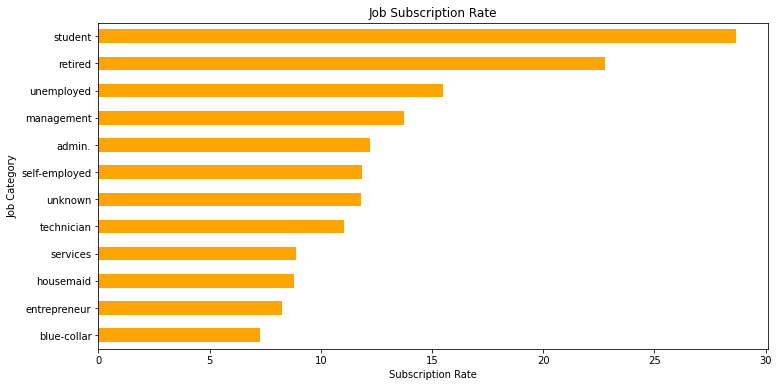

In [45]:
job_subscription['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6), color='orange')
                                                                               
plt.title('Job Subscription Rate')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
plt.show()

As we can see students and retired clients make more then half of the subscription.

**2) Subscription rate by education**

In [46]:
# First find unique features
bank.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [47]:
education_subscription = pd.crosstab(bank1['subscription'],bank1['education']).apply(lambda x: x/x.sum() * 100)
education_subscription

education,primary,secondary,tertiary,unknown
subscription,,,,
no,91.373522,89.440565,84.99361,86.429725
yes,8.626478,10.559435,15.00639,13.570275


In [48]:
education_subscription = education_subscription.transpose()
education_subscription

subscription,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


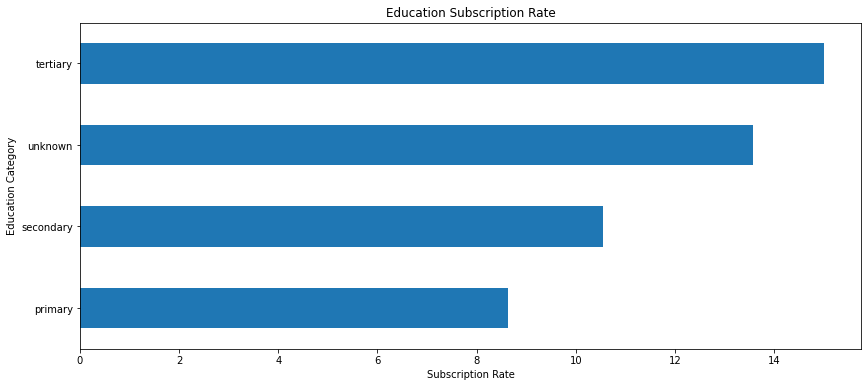

In [49]:
education_subscription['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (14,6));
                                                                               
plt.title('Education Subscription Rate')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')
plt.show()

As we can see primary and secondary education level make low subscription rate.

**2) Subscription rate by month**

In [50]:
month_subscription = pd.crosstab(bank1['subscription'],bank1['month']).apply(lambda x: x/x.sum() * 100)
month_subscription

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
subscription,,,,,,,,,,,,
no,80.3206,88.986714,53.271028,83.352208,89.878831,90.906454,89.777195,48.008386,93.280546,89.848866,56.233062,53.540587
yes,19.6794,11.013286,46.728972,16.647792,10.121169,9.093546,10.222805,51.991614,6.719454,10.151134,43.766938,46.459413


In [51]:
month_subscription = month_subscription.transpose()
month_subscription

subscription,no,yes
month,,
apr,80.320600,19.679400
aug,88.986714,11.013286
dec,53.271028,46.728972
feb,83.352208,16.647792
jan,89.878831,10.121169
jul,90.906454,9.093546
jun,89.777195,10.222805
mar,48.008386,51.991614
may,93.280546,6.719454


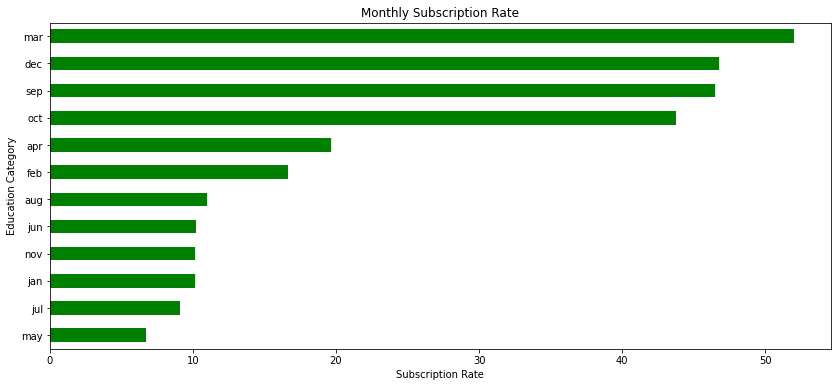

In [52]:
month_subscription['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (14,6), color = 'g')
                                                                               
plt.title('Monthly Subscription Rate')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')
plt.show()

As we can see subscription rate is high in March, September, October, December.

**4) Subscription rate by contact**

In [53]:
contact_subscription = pd.crosstab(bank1['subscription'],bank1['contact']).apply(lambda x: x/x.sum() * 100)
contact_subscription

contact,cellular,telephone,unknown
subscription,,,
no,85.0811,86.579491,95.929339
yes,14.9189,13.420509,4.070661


In [54]:
contact_subscription = contact_subscription.transpose()
contact_subscription

subscription,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661


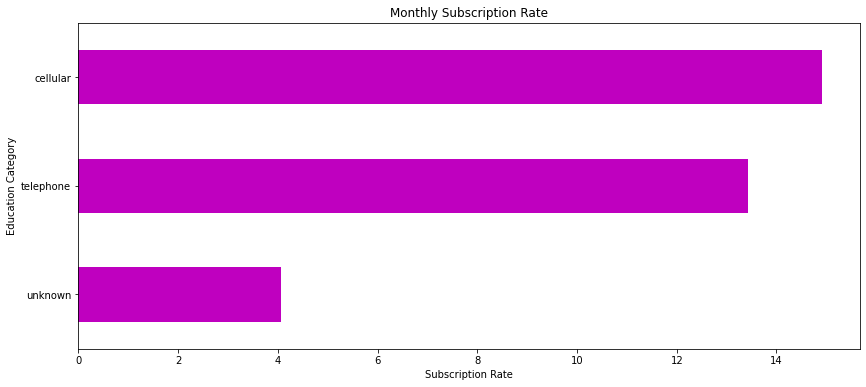

In [55]:
contact_subscription['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (14,6), color = 'm')
                                                                               
plt.title('Monthly Subscription Rate')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')
plt.show()

As we can see cellular and telephone contacted clients make most of the subscription.

#Cleaning the dataset

In [56]:
# Eliminating  values like “unknown” & “others”
col = [c for c in bank.columns]
col_missing = []
for c in col:
    if 'unknown' in bank[c].values:
        col_missing.append(c)
        
print("Columns with 'Unknown' Values :",col_missing) 

Columns with 'Unknown' Values : ['job', 'education', 'contact', 'poutcome']


<ipython-input-56-f6411d177f32>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in bank[c].values:


In [57]:
print("Unknown & Others values count")
for c in col_missing:
    print(c,":",bank[bank[c].str.contains('unknown' or 'others')][c].count())

Unknown & Others values count
job : 288
education : 1857
contact : 13020
poutcome : 36959


In [58]:
print(bank.groupby(bank['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [59]:
print(bank.groupby(bank['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [60]:
print(bank.groupby(bank['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [61]:
print(bank.groupby(bank['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



#Converting Boolean Data into Boolean Numbers

In [62]:
bank1 = bank.copy()
bank1[['job','education','contact','poutcome']] = bank1[['job','education','contact','poutcome']].replace('unknown','other')

bank1['default'] = np.where(bank1['default'].str.contains("yes"), 1, 0)
bank1['housing'] = np.where(bank1['housing'].str.contains("yes"), 1, 0)
bank1['loan'] = np.where(bank1['loan'].str.contains("yes"), 1, 0)
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0


In [63]:
bank2 = bank1.select_dtypes(include=['object'])
bank2.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [64]:
print("Poutcome variables:\n",bank2.poutcome.value_counts())
print("\nContact variables:\n",bank2.contact.value_counts())

Poutcome variables:
 other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

Contact variables:
 cellular     29285
other        13020
telephone     2906
Name: contact, dtype: int64


In [65]:
# Get dummy variables of all categorical columns
dummies = pd.get_dummies(bank2)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [66]:
# Concatenate & display the two dataframes bank1 and dummies
data = pd.concat([bank1,dummies],axis=1)
data.drop(columns=bank2.columns,axis=1,inplace=True)

data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_other            4

#Model Building

In [68]:
# Dividing our data into input and output variables
x = pd.concat([data.iloc[:,0:10],data.iloc[:,11:]],axis=1)
y = data.iloc[:,10]

In [69]:
# Logistic regression
c = LogisticRegression()
c.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model Predictions

In [70]:
# Predict for x dataset
y_predict = c.predict(x)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
y_predict_df = pd.DataFrame({'actual_y':y,'y_pred_prob':y_predict})
y_predict_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


#Testing Model Accuracy

In [72]:
# Build a Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y,y_predict)
confusion_matrix

array([[39160,   762],
       [ 4115,  1174]])

In [73]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
'''
[a  b
 c  d]
'''

(39160+1174)/(39160+762+4115+1174)

0.8921280219415629

As we can see our model accuracy is good. We can use this model for further predictions.

In [74]:
c.predict_proba(x)[:,1] 

array([0.04345669, 0.02410864, 0.01757207, ..., 0.69790553, 0.08074399,
       0.072604  ])

# ROC curve & Find AUC value

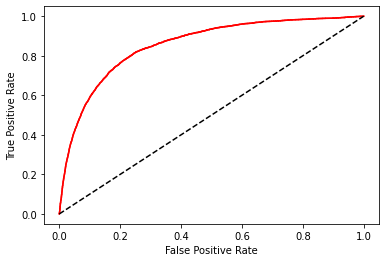

AUC accuracy: 0.6014414532994283


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr,tpr,thresholds = roc_curve(y,c.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(y,y_predict)

''' y-axis contains True Positive Rate values
    x-axis contains False Positive Rate or (1 - True Negative Rate) values
'''
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC accuracy:',auc)

#Applying Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , GridSearchCV, train_test_split

df = data.copy()

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [77]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

<ipython-input-77-48e3e55a8e58>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_standard_scaled.drop('y', 1)


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [79]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 47)
Shape of X_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


Applying Recursive Feature Elimination

In [80]:
from sklearn.feature_selection import RFE

# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [81]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False  True False
  True  True  True  True False  True  True  True  True  True  True]
[22 32  1 30  1  3 31 19 33 28 13 17 12  8 25 16  6 24 18  1 27 15 20  9
 29 26  7 23 14  4  1  5 21  2  1 11  1  1  1  1 10  1  1  1  1  1  1]


In [82]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [83]:
col1 = x_train.columns[rfe.support_]
x_train_sm = smf.add_constant(x_train[col1])
logm1 = smf.GLM(y_train,x_train_sm, family=smf.families.Binomial())
res = logm1.fit()

# predicted values of the train dataset giving the probability
x_test_sm = smf.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


14001    0.018454
32046    0.678343
13318    0.064300
42991    0.038483
14237    0.049484
14360    0.021599
36635    0.050462
37042    0.033097
25994    0.048280
14555    0.028432
dtype: float64

In [84]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01845388, 0.67834328, 0.06430027, 0.03848295, 0.04948354,
       0.02159921, 0.05046177, 0.03309678, 0.04828012, 0.02843184])

In [85]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.018454,14001
1,1,0.678343,32046
2,0,0.064300,13318
3,0,0.038483,42991
4,0,0.049484,14237
5,0,0.021599,14360
6,0,0.050462,36635
7,0,0.033097,37042
8,0,0.048280,25994
9,0,0.028432,14555


In [91]:
# Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.018454,14001,0
1,1,0.678343,32046,1
2,0,0.064300,13318,0
3,0,0.038483,42991,0
4,0,0.049484,14237,0
5,0,0.021599,14360,0
6,0,0.050462,36635,0
7,0,0.033097,37042,0
8,0,0.048280,25994,0
9,0,0.028432,14555,0


In [88]:
# creating confusion matrix for the following prediction
confusion_matrix = confusion_matrix[y_test_pred_final.Sub, y_test_pred_final.predict]
confusion_matrix

array([39160,  1174, 39160, ..., 39160,  4115, 39160])

In [104]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_pred_final.Sub, y_test_pred_final.predict))

0.8993696782041358


#ROC & AUC

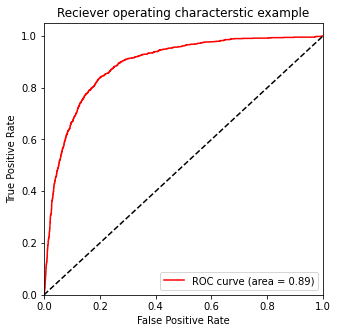

AUC accuracy: 0.6604392566552788


In [102]:
def roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score,color='red')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()

    auc = roc_auc_score(y_test_pred_final.Sub,y_test_pred_final.predict)
    print('AUC accuracy:',auc)
    
    return None

fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)
roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)


As we can see, now our ROC and AUC values have been improved. We can use this for further predictions.

**Hence we can conclude that:**


*   People with account balance above $1490 are more likely to subscribe for deposit.
*   The age of customers and no. of contacts also affects campaign outcome as well.







